# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 3: Planetary Motions
## 03.03.2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats
import time
import imageio
import os, shutil
from matplotlib.patches import Circle

In [2]:
sns.set_style(style='whitegrid')

### Planets

In [3]:
Planets={
    'Mercury': [0.466697, 0.205630],
    'Venus': [0.728213, 0.006772],
    'Earth': [1.017, 0.0167086],
    'Mars': [1.666, 0.0934],
    'Jupiter': [5.4588, 0.0489],
    'Saturn': [10.1238, 0.0565],
    'Uranus': [20.11, 0.046381],
    'Neptune': [30.33, 0.009456],
    'Pluto': [49.305, 0.2488],
    'Halley': [35.082, 0.96714]
}

## Initial conditions

In [48]:
choosen_planet = 'Earth'
# Aphelion distance in AU
r_ap = Planets[choosen_planet][0]
# Eccentricity
ecc = Planets[choosen_planet][1]
# Number of periods
periods = 10
# Step size
dt = 0.05
# Adaptive accuracy of simulation
accuracy = 1e-06

# Calculated orbit parameters
a = r_ap / (1 + ecc)
b = np.sqrt(1 - ecc**2) * a

# Others
steps = 1
image_dpi = 150
image_format = 'png'
image_path = '..\\Documentation\\src\\images\\'

In [49]:
def mode_choose():
    
    current_mode = ('..\Release\kepler.exe ' +
                    str(r_ap) + ' ' +
                    str(ecc) + ' ' +
                    str(periods) + ' ' +
                    str(dt) + ' ' +
                    str(accuracy)
                )

    return(current_mode)

In [50]:
current_mode = mode_choose()
os.system(current_mode)
data_fix = np.genfromtxt('fixed.dat')
data_adaptive = np.genfromtxt('adaptive.dat')

## First plotting

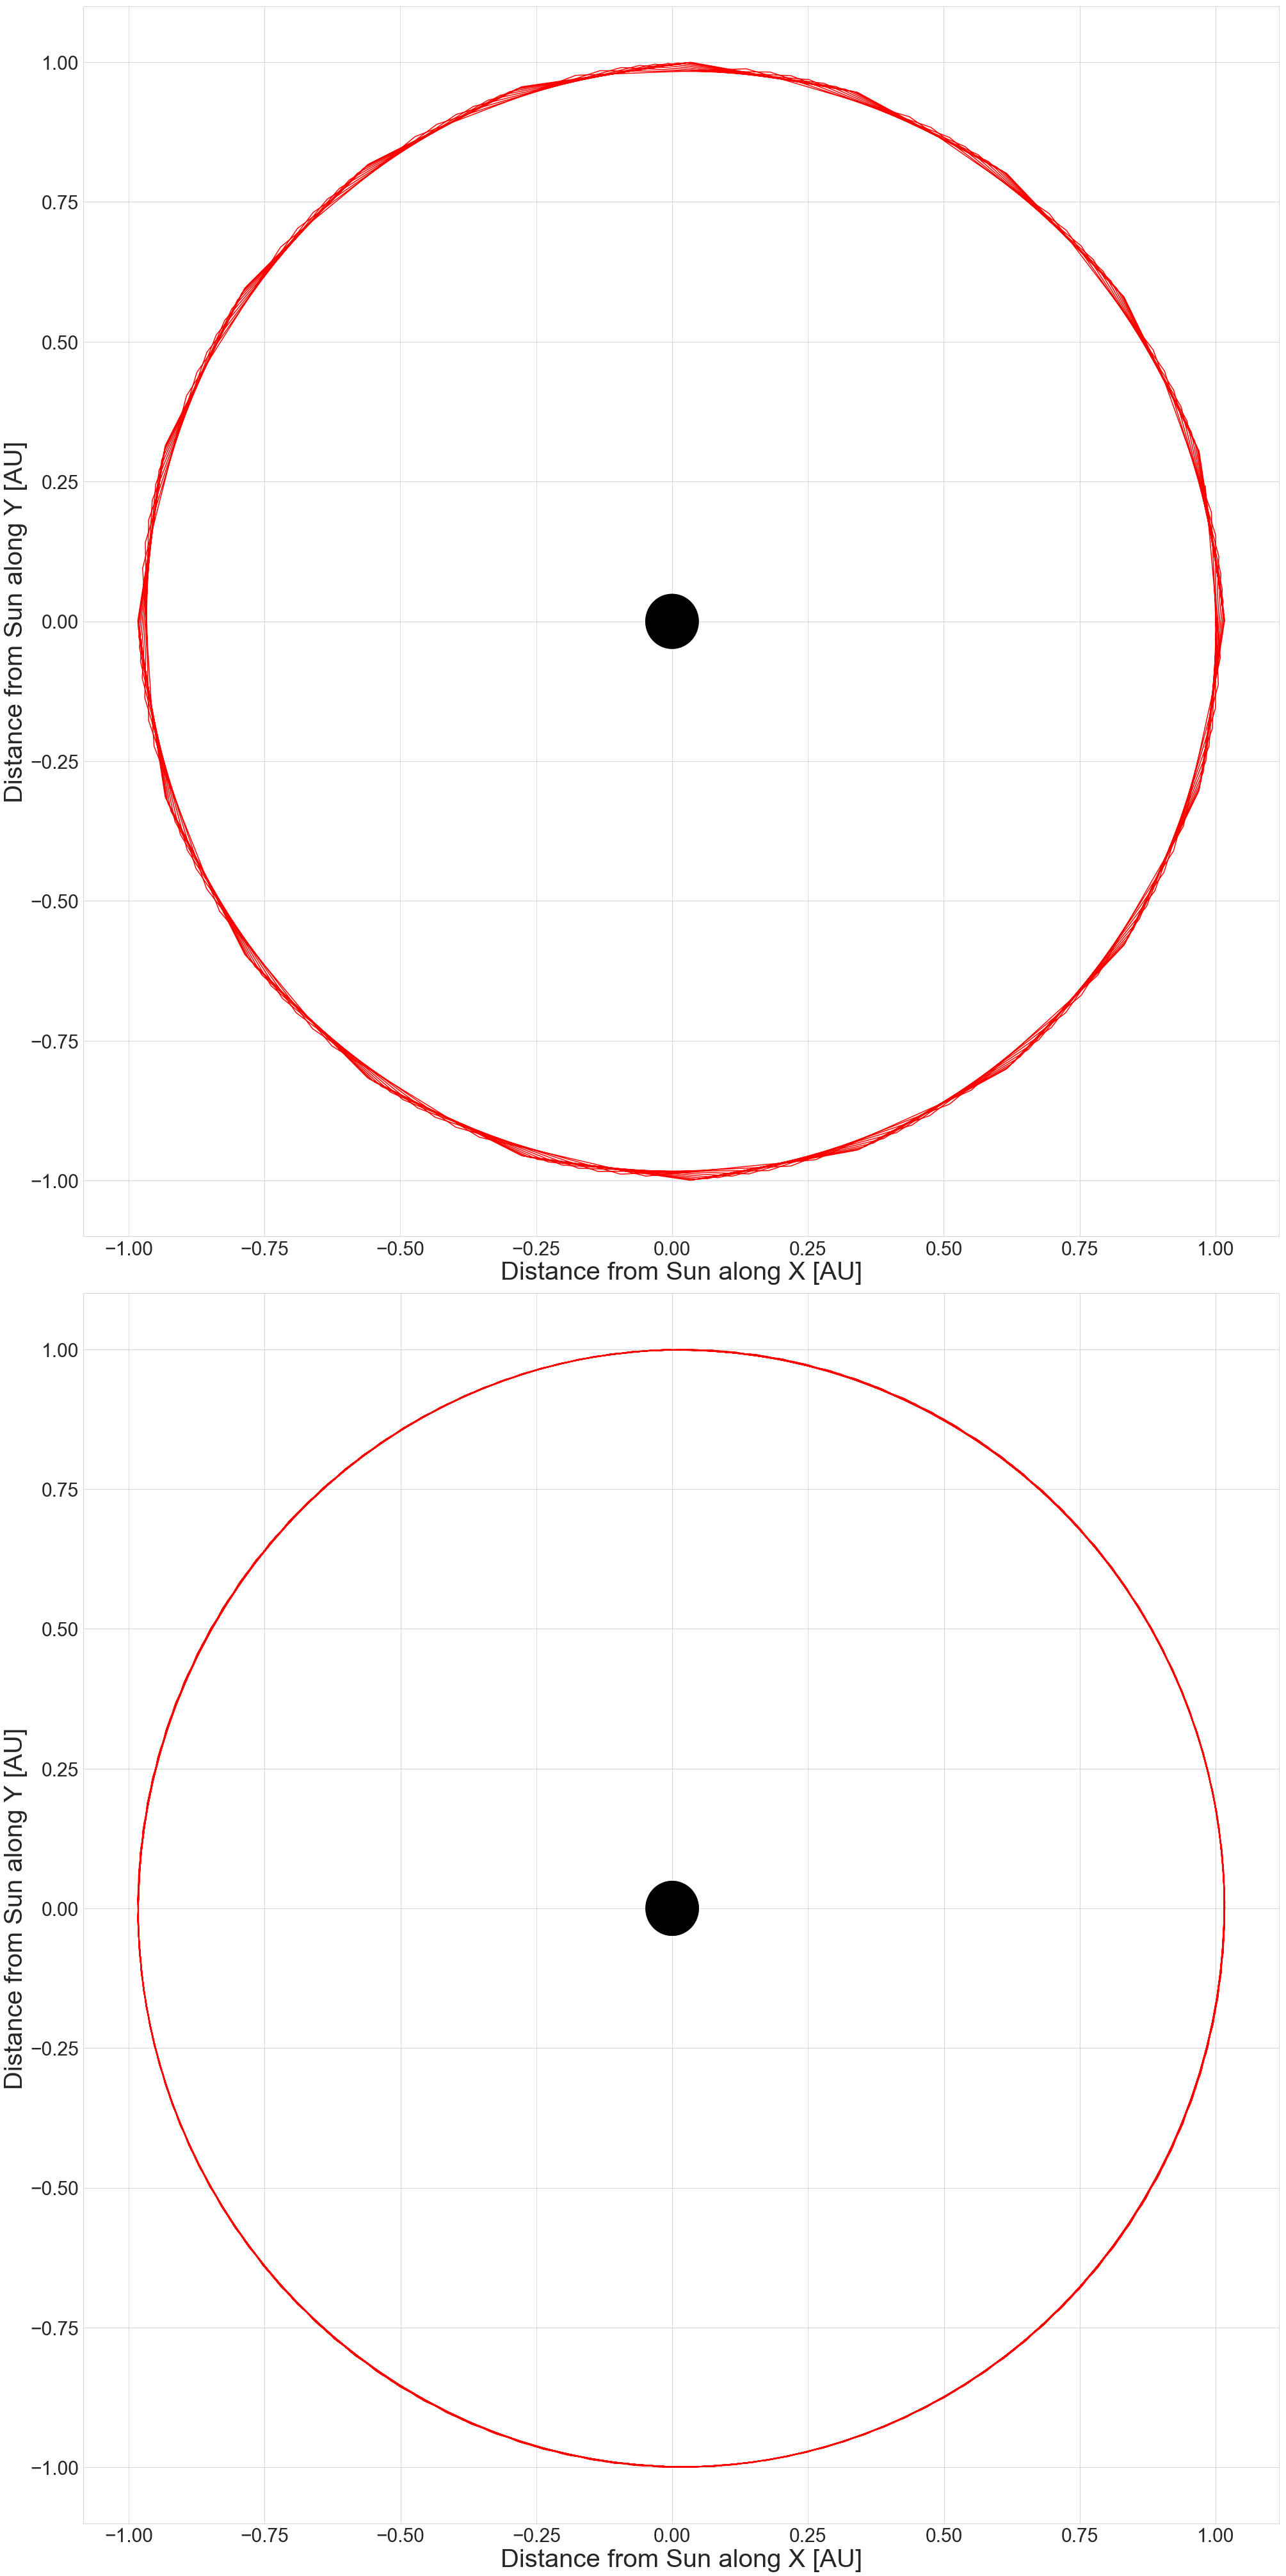

In [51]:
nrows = 2
ncols = 1
picsize = 14
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=((nrows*picsize)*(a/b),2*nrows*picsize))

axes[0].plot(data_fix[::steps,1], data_fix[::steps,2], c='red')
axes[1].plot(data_adaptive[::steps,1], data_adaptive[::steps,2], c='red')

axes[0].set_xlabel('Distance from Sun along X [AU]', fontsize=40)
axes[0].set_ylabel('Distance from Sun along Y [AU]', fontsize=40)
axes[1].set_xlabel('Distance from Sun along X [AU]', fontsize=40)
axes[1].set_ylabel('Distance from Sun along Y [AU]', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

Sun_1 = Circle((0, 0), 0.05, fc='k', zorder=10)
Sun_2 = Circle((0, 0), 0.05, fc='k', zorder=10)
axes[0].add_patch(Sun_1)
axes[1].add_patch(Sun_2)

fig.tight_layout()
'''plt.savefig(image_path +
            'orbit_' + choosen_planet + '.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')'''
plt.show()

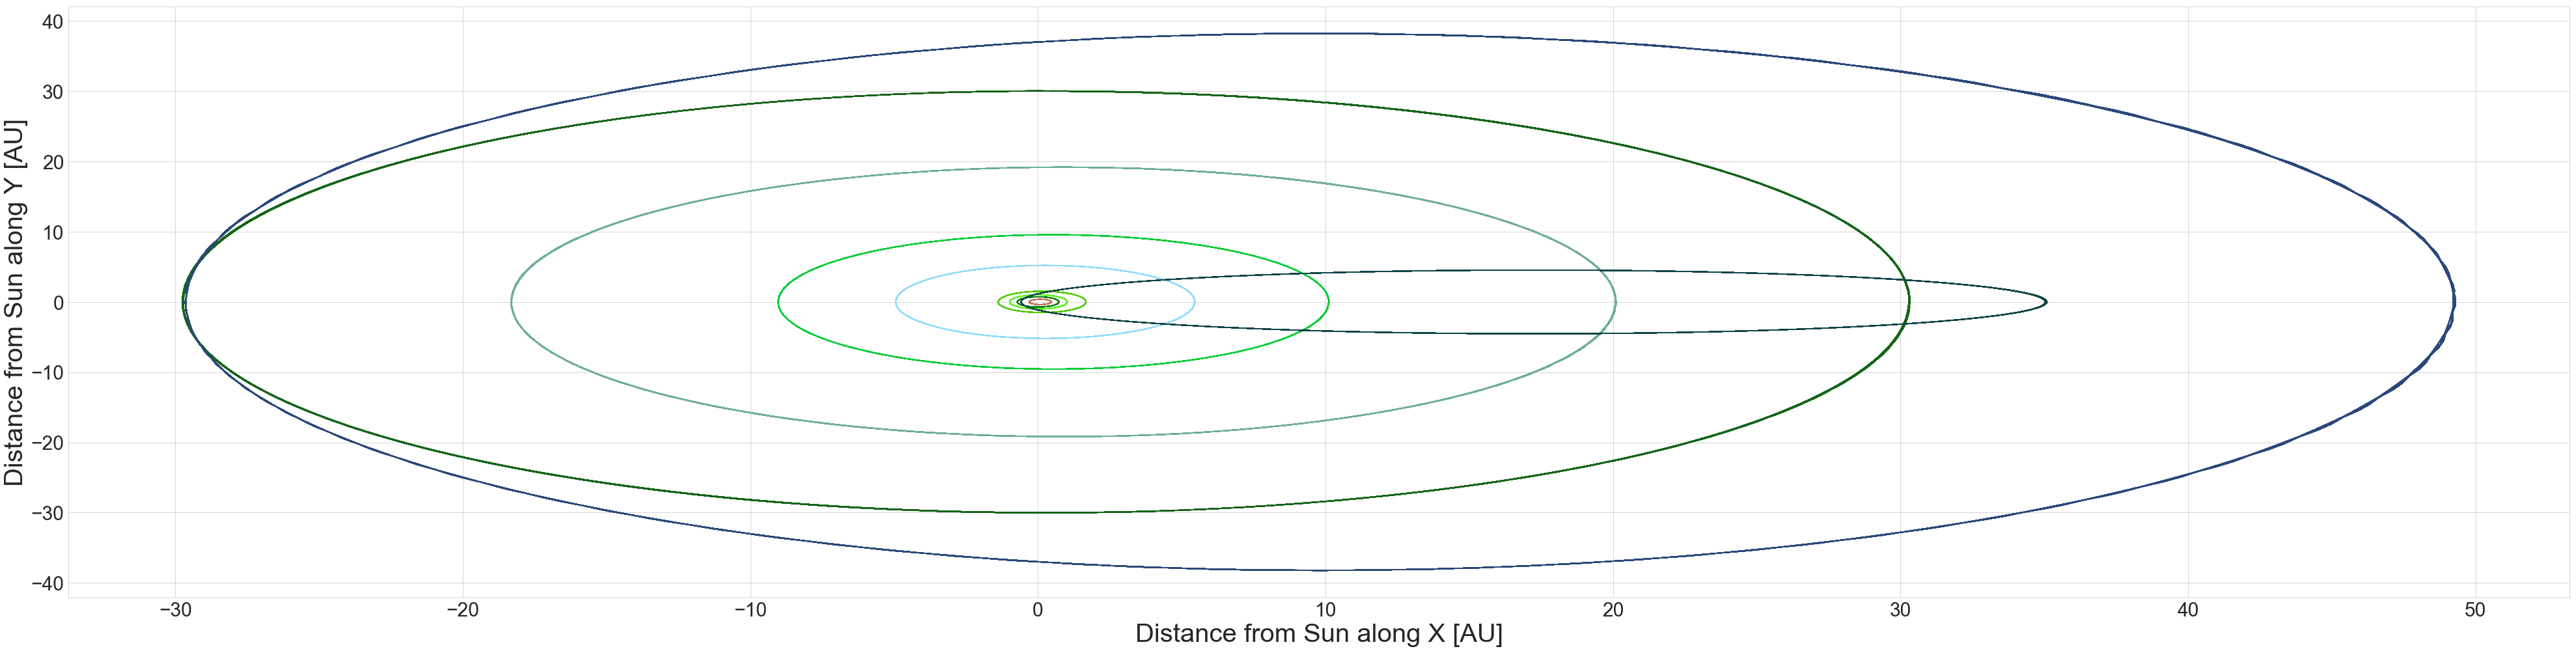

In [8]:
nrows = 1
ncols = 1
picsize = 14
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=((nrows*picsize)*(a/b),nrows*picsize))

for keys, values in Planets.items():
    if (True):
        color = np.array((np.random.rand(),np.random.rand(),np.random.rand()))
        # Aphelion distance in AU
        r_ap = Planets[keys][0]
        # Eccentricity
        ecc = Planets[keys][1]
        current_mode = mode_choose()
        os.system(current_mode)
        data_adaptive = np.genfromtxt('adaptive.dat')
        axes.plot(data_adaptive[::steps,1], data_adaptive[::steps,2], c=color)

    
axes.set_xlabel('Distance from Sun along X [AU]', fontsize=40)
axes.set_ylabel('Distance from Sun along Y [AU]', fontsize=40)

axes.tick_params(axis='both', which='major', labelsize=30)

Sun = Circle((0, 0), 0.05, fc='k', zorder=10)
axes.add_patch(Sun)

fig.tight_layout()
plt.savefig(image_path +
            'orbit_all.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

In [9]:
def ANIMATE_VIDEO(path, video_title, mode):

    if(mode=='both'):
        video_title = 'double_pendulum_both.mp4'
        nrows=1
        ncols=1
        
    elif(mode=='compare'):
        video_title = 'double_pendulum_compare.mp4'
        nrows=1
        ncols=2
        
    else:
        nrows=1
        ncols=1
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14,nrows*14))

    
    if(mode=='rkck'):
        x1 = coordinates_rkck[::steps,1]
        y1 = coordinates_rkck[::steps,2]
        x2 = coordinates_rkck[::steps,3]
        y2 = coordinates_rkck[::steps,4]

    elif(mode=='runge'):
        x1 = coordinates_runge[::steps,1]
        y1 = coordinates_runge[::steps,2]
        x2 = coordinates_runge[::steps,3]
        y2 = coordinates_runge[::steps,4]
        
    elif(mode=='both' or mode=='compare'):
        x1_rkck = coordinates_rkck[::steps,1]
        y1_rkck = coordinates_rkck[::steps,2]
        x2_rkck = coordinates_rkck[::steps,3]
        y2_rkck = coordinates_rkck[::steps,4]

        x1_runge = coordinates_runge[::steps,1]
        y1_runge = coordinates_runge[::steps,2]
        x2_runge = coordinates_runge[::steps,3]
        y2_runge = coordinates_runge[::steps,4]

    # Pendulum's circle size
    r_1 = 0.05 * np.power(m_1, 1/3)
    r_2 = 0.05 * np.power(m_2, 1/3)
    r = max(r_1, r_2)
    # Plot a trail of the m2 bob's position for the last trail_secs seconds.
    trail_secs = 1
    # This corresponds to max_trail time points.
    max_trail = int(trail_secs / dt)

    ##ANIMATION STUFF BEGINS HERE##

    def animation(i):
            
        if(mode=='both'):
            # Centre the image on the fixed anchor point, and ensure the axes are equal
            ax.set_xlim(-L_1-L_2-r, L_1+L_2+r)
            ax.set_ylim(-L_1-L_2-r, L_1+L_2+r)
            ax.set_aspect('equal', adjustable='box')
            
            # Plot and save an image of the double pendulum configuration for time
            # point i.
            # The pendulum rods.
            ax.plot([0, x1_rkck[i], x2_rkck[i]], [0, y1_rkck[i], y2_rkck[i]], lw=2, c='k')
            ax.plot([0, x1_runge[i], x2_runge[i]], [0, y1_runge[i], y2_runge[i]], lw=2, c='k')
            # Circles representing the anchor point of rod 1, and bobs 1 and 2.
            c0 = Circle((0, 0), 0.05/2, fc='k', zorder=10)
            c1_rkck = Circle((x1_rkck[i], y1_rkck[i]), r_1, fc='red', ec='red', zorder=10)
            c2_rkck = Circle((x2_rkck[i], y2_rkck[i]), r_2, fc='green', ec='green', zorder=10)
            c1_runge = Circle((x1_runge[i], y1_runge[i]), r_1, fc='blue', ec='blue', zorder=10)
            c2_runge = Circle((x2_runge[i], y2_runge[i]), r_2, fc='orange', ec='orange', zorder=10)
            ax.add_patch(c0)
            ax.add_patch(c1_rkck)
            ax.add_patch(c2_rkck)
            ax.add_patch(c1_runge)
            ax.add_patch(c2_runge)

            ax.plot(x1_rkck[0:i], y1_rkck[0:i], c='red', solid_capstyle='butt', lw=2)
            ax.plot(x2_rkck[0:i], y2_rkck[0:i], c='green', solid_capstyle='butt', lw=2)
            ax.plot(x1_runge[0:i], y1_runge[0:i], c='blue', solid_capstyle='butt', lw=2)
            ax.plot(x2_runge[0:i], y2_runge[0:i], c='orange', solid_capstyle='butt', lw=2)
            
            # Don't show axes, only white background
            ax.axis('off')
        
        elif(mode=='compare'):

            # Centre the image on the fixed anchor point, and ensure the axes are equal
            ax[0].set_xlim(-L_1-L_2-r, L_1+L_2+r)
            ax[0].set_ylim(-L_1-L_2-r, L_1+L_2+r)
            ax[0].set_aspect('equal', adjustable='box')
            
            ax[1].set_xlim(-L_1-L_2-r, L_1+L_2+r)
            ax[1].set_ylim(-L_1-L_2-r, L_1+L_2+r)
            ax[1].set_aspect('equal', adjustable='box')
            
            # Plot and save an image of the double pendulum configuration for time
            # point i.
            # The pendulum rods.
            ax[0].plot([0, x1_rkck[i], x2_rkck[i]], [0, y1_rkck[i], y2_rkck[i]], lw=2, c='k')
            ax[1].plot([0, x1_runge[i], x2_runge[i]], [0, y1_runge[i], y2_runge[i]], lw=2, c='k')
            # Circles representing the anchor point of rod 1, and bobs 1 and 2.
            c0_0 = Circle((0, 0), 0.05/2, fc='k', zorder=10)
            c0_1 = Circle((0, 0), 0.05/2, fc='k', zorder=10)
            c1_rkck = Circle((x1_rkck[i], y1_rkck[i]), r_1, fc='red', ec='red', zorder=10)
            c2_rkck = Circle((x2_rkck[i], y2_rkck[i]), r_2, fc='green', ec='green', zorder=10)
            c1_runge = Circle((x1_runge[i], y1_runge[i]), r_1, fc='blue', ec='blue', zorder=10)
            c2_runge = Circle((x2_runge[i], y2_runge[i]), r_2, fc='orange', ec='orange', zorder=10)
            ax[0].add_patch(c0_0)
            ax[1].add_patch(c0_1)
            ax[0].add_patch(c1_rkck)
            ax[0].add_patch(c2_rkck)
            ax[1].add_patch(c1_runge)
            ax[1].add_patch(c2_runge)

            ax[0].plot(x1_rkck[0:i], y1_rkck[0:i], c='red', solid_capstyle='butt', lw=2)
            ax[0].plot(x2_rkck[0:i], y2_rkck[0:i], c='green', solid_capstyle='butt', lw=2)
            ax[1].plot(x1_runge[0:i], y1_runge[0:i], c='blue', solid_capstyle='butt', lw=2)
            ax[1].plot(x2_runge[0:i], y2_runge[0:i], c='orange', solid_capstyle='butt', lw=2)
            
            # Don't show axes, only white background
            ax[0].axis('off')
            ax[1].axis('off')
            
        else:
            # Centre the image on the fixed anchor point, and ensure the axes are equal
            ax.set_xlim(-L_1-L_2-r, L_1+L_2+r)
            ax.set_ylim(-L_1-L_2-r, L_1+L_2+r)
            ax.set_aspect('equal', adjustable='box')
            
            # Plot and save an image of the double pendulum configuration for time
            # point i.
            # The pendulum rods.
            ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k')
            # Circles representing the anchor point of rod 1, and bobs 1 and 2.
            c0 = Circle((0, 0), 0.05/2, fc='k', zorder=10)
            c1 = Circle((x1[i], y1[i]), r_1, fc='orange', ec='orange', zorder=10)
            c2 = Circle((x2[i], y2[i]), r_2, fc='purple', ec='purple', zorder=10)
            ax.add_patch(c0)
            ax.add_patch(c1)
            ax.add_patch(c2)

            ax.plot(x1[0:i], y1[0:i], c='orange', solid_capstyle='butt', lw=2)
            ax.plot(x2[0:i], y2[0:i], c='purple', solid_capstyle='butt', lw=2)
            
            # Don't show axes, only white background
            ax.axis('off')
        
        
        plt.savefig(path + '_img{:04d}.png'.format(i), dpi=72)    # Save next frame as png
        image = imageio.imread(path + '_img{:04d}.png'.format(i)) # Load saved image
        writer.append_data(image)                                 # Append this image as the next frame to video

        # Clear the pyplot background for the next frame
        if(mode=='compare'):
            ax[0].cla()
            ax[1].cla()
        else:
            plt.cla()
            
        # Delete the now useless image from frames' folder
        os.unlink(path + '_img{:04d}.png'.format(i))

    with imageio.get_writer(video_title, fps=fps) as writer:
        if(mode=='both' or mode=='compare'):
            for i in range(0, len(x1_rkck)):
                sys.stdout.write('\r' + str(i+1) + ' / ' + str(len(x1_rkck)))
                sys.stdout.flush()
                animation(i)
        else:
            for i in range(0, len(x1)):
                sys.stdout.write('\r' + str(i+1) + ' / ' + str(len(x1)))
                sys.stdout.flush()
                animation(i)